In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

# Simulate two Isolated kinks and make a MOVIE (gif) of some observable over time
This files makes, in sequence
- Prepare a state with two isolated kinks (_initialization/twokinksinit.c_)
- Simulate the 1D TDGL equation with that initial state and the C(t) specified
- Measures (and plots as an animation) 
    - State $u(x)$ and its second derivative $u_{xx}(x)$ (to highlight kinks' positions) in **real-time**
    - The "height" of the plateau region between the kinks
    - The distance between the kinks
all as a function of time (animated).

N = 1280

u0 = 0.707000


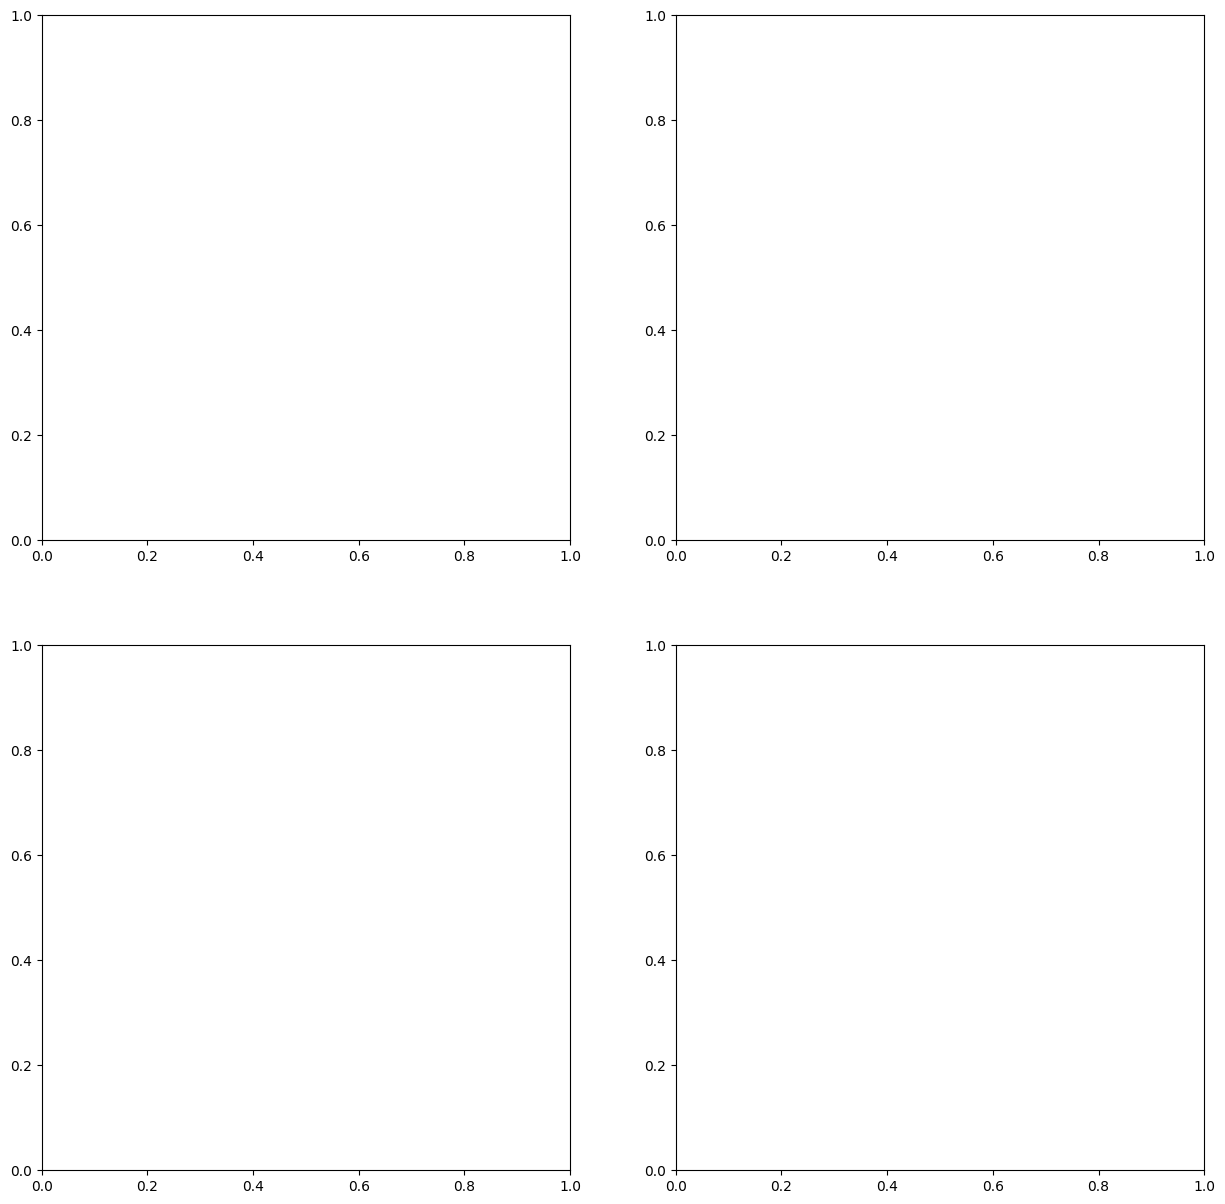

In [2]:
# Define C(t)
Cbar = 0.5
A = 1
T = 50
Ctitle = "$C(t) = "+str(Cbar)+"+"+str(A)+str("\sin(2\pi t/T); T="+str(T)+"$")

# Prepare the state (twokinks)
simul_name = "Cbar=1A=1.5T=35"
L = 128
dx = 0.1
dt = 0.1
N = int(L/dx)
print("N = "+str(N)+"\n")
d0 = 20
u0 = round(np.sqrt(Cbar),3)
os.system("cd ..; ./.bin/twokinks "+str(N)+" "+str(d0)+" "+str(u0))

title = "L="+str(L)+"; $d_0=$"+str(d0)

# Set simulation parameters
dtspan = 1    # Take a snapshot each dtspan time span

tc = 841 # Extimated collapse time
#tspan = (4/3)*tc
tspan = 1000


"""
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax3 = plt.subplot(224)
"""
fig, ax = plt.subplots(2,2, figsize=(15,15));

In [3]:
np.sqrt(Cbar)

0.7071067811865476

In [4]:
# Run simulation
time = 0
J = int(round(tspan/dtspan))
for j in np.arange(0,J):
    NNN = 10000000
    os.system("cd ..; ./.bin/tdgl "+str(dtspan)+" "+str(A)+" "+str(T)+" "+str(Cbar)+" 0 "+str(dt))
    if time > 400:
        # Read state
        f = open("../tdgl_result.dat", "r")
        x = np.zeros(NNN)
        y = np.zeros(NNN)
        i = 0
        for row in f:
            if i != 0:
                a, b = row.split(" ")
                x[i-1] = float(a)
                y[i-1] = float(b)
            else:
                N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
                N = int(N)
            i = i + 1
        x = x[0:i-1]
        y = y[0:i-1]
        ax[0,0].clear()
        ax[0,0].plot(x,y)
        ax[0, 0].set_xlabel("x")
        ax[0, 0].set_ylabel("u(x)")

        # Measure the "height" of the plateaux between the kinks
        #ax[1,0].clear()
        #print(float(tmax)-(j+1)*dtspan)
        ax[0,1].plot((j+1)*dtspan, y[int(len(x)/2)],'*',color="blue")
        ax[0,1].set_xlim(float(tmax)-10*dtspan,float(tmax))
        ax[0, 1].set_xlabel("t")
        ax[0, 1].set_ylabel("u(L/2)")
        ax[0,1].set_title("Plateaux between kinks")
        
        # Read distance
        f = open("../filekinkdist.dat", "r")
        d0 = 20
        #tc = 7460
        tdist = np.zeros(NNN)
        dist = np.ones(NNN)*(-1)
        i = 0
        #tc = 0
        for row in f:
            a, b = row.split(" ")
            dist[i] = float(b)
            tdist[i] = float(a)
            #print(dist[i])
            if tc == 0 and dist[i]<2*float(dx):
                tc = tdist[i]
            i = i + 1
        tdist = tdist[0:i]
        logt = np.log(tc*np.ones(len(tdist))-tdist)
        dist = dist[0:i]
        logy = np.log(dist)
        ax[1,0].clear()
        #ax[1,0].set_xlim(0,np.log(tc))
        #ax[1,0].plot(logt, logy)
        ax[1,0].plot(tdist, dist,'*')
        ax[1,0].set_xlabel("t")
        ax[1,0].set_ylabel("d")
        #ax[1, 0].set_xlabel("$\log(t_c-t)$")
        #ax[1, 0].set_ylabel("$\log d$")
        ax[1,0].set_title("$t_c$ = "+str(tc))
        extd = dist[i-1]
        extX1 = x[int(len(x)/2)]-extd/2
        extX2 = x[int(len(x)/2)]+extd/2
        dx = float(dx)
        ax[0,0].plot(extX1, y[int(round(extX1/dx))],'*', color="black")
        ax[0,0].plot(extX2, y[int(extX2/dx)],'*', color="black")

        # Read C(t)
        f = open("../fileCout.dat", "r")
        tC = np.zeros(NNN)
        C = np.zeros(NNN)
        i = 0
        for row in f:
            a, b = row.split(" ")
            tC[i] = float(a)
            C[i] = float(b)
            i = i + 1
        tC = tC[0:i]
        C = C[0:i]
        ax[1,1].clear()
        ax[1,1].plot(tC,C)
        ax[1,1].set_xlim(float(tmax)-5*T,float(tmax))
        ax[1, 1].set_ylabel("C(t)")
        ax[1, 1].set_xlabel("t")
        ax[1, 1].set_title(Ctitle)

        fig.suptitle(title+"\nt = "+tmax)
        fig.savefig(".snapshots/"+str(j)+".png")
    time = time + dtspan

t = 1.000000
t = 2.000000
t = 3.000000
t = 4.000000
t = 5.000000
t = 6.000000
t = 7.000000
t = 8.000000
t = 9.000000
t = 10.000000
t = 11.000000
t = 12.000000
t = 13.000000
t = 14.000000
t = 15.000000
t = 16.000000
t = 17.000000
t = 18.000000
t = 19.000000
t = 20.000000
t = 21.000000
t = 22.000000
t = 23.000000
t = 24.000000
t = 25.000000
t = 26.000000
t = 27.000000
t = 28.000000
t = 29.000000
t = 30.000000
t = 31.000000
t = 32.000000
t = 33.000000
t = 34.000000
t = 35.000000
t = 36.000000
t = 37.000000
t = 38.000000
t = 39.000000
t = 40.000000
t = 41.000000
t = 42.000000
t = 43.000000
t = 44.000000
t = 45.000000
t = 46.000000
t = 47.000000
t = 48.000000
t = 49.000000
t = 50.000000
t = 51.000000
t = 52.000000
t = 53.000000
t = 54.000000
t = 55.000000
t = 56.000000
t = 57.000000
t = 58.000000
t = 59.000000
t = 60.000000
t = 61.000000
t = 62.000000
t = 63.000000
t = 64.000000
t = 65.000000
t = 66.000000
t = 67.000000
t = 68.000000
t = 69.000000
t = 70.000000
t = 71.000000
t = 72.000000
t

/tmp/ipykernel_12367/2251943833.py:55: RuntimeWarning: divide by zero encountered in log
  logt = np.log(tc*np.ones(len(tdist))-tdist)


t = 842.000000


/tmp/ipykernel_12367/2251943833.py:55: RuntimeWarning: invalid value encountered in log
  logt = np.log(tc*np.ones(len(tdist))-tdist)


t = 843.000000
t = 844.000000
t = 845.000000
t = 846.000000
t = 847.000000
t = 848.000000
t = 849.000000
t = 850.000000
t = 851.000000
t = 852.000000
t = 853.000000
t = 854.000000
t = 855.000000
t = 856.000000
t = 857.000000
t = 858.000000
t = 859.000000
t = 860.000000
t = 861.000000
t = 862.000000
t = 863.000000
t = 864.000000
t = 865.000000
t = 866.000000
t = 867.000000
t = 868.000000
t = 869.000000
t = 870.000000
t = 871.000000
t = 872.000000
t = 873.000000
t = 874.000000
t = 875.000000
t = 876.000000
t = 877.000000
t = 878.000000
t = 879.000000
t = 880.000000
t = 881.000000
t = 882.000000
t = 883.000000
t = 884.000000
t = 885.000000
t = 886.000000
t = 887.000000
t = 888.000000
t = 889.000000
t = 890.000000
t = 891.000000
t = 892.000000
t = 893.000000
t = 894.000000
t = 895.000000
t = 896.000000
t = 897.000000
t = 898.000000
t = 899.000000
t = 900.000000
t = 901.000000
t = 902.000000
t = 903.000000
t = 904.000000
t = 905.000000


/tmp/ipykernel_12367/2251943833.py:57: RuntimeWarning: divide by zero encountered in log
  logy = np.log(dist)


t = 906.000000
t = 907.000000
t = 908.000000
t = 909.000000
t = 910.000000
t = 911.000000
t = 912.000000
t = 913.000000
t = 914.000000
t = 915.000000
t = 916.000000
t = 917.000000
t = 918.000000
t = 919.000000
t = 920.000000
t = 921.000000
t = 922.000000
t = 923.000000
t = 924.000000
t = 925.000000
t = 926.000000
t = 927.000000
t = 928.000000
t = 929.000000
t = 930.000000
t = 931.000000
t = 932.000000
t = 933.000000
t = 934.000000
t = 935.000000
t = 936.000000
t = 937.000000
t = 938.000000
t = 939.000000
t = 940.000000
t = 941.000000
t = 942.000000
t = 943.000000
t = 944.000000
t = 945.000000
t = 946.000000
t = 947.000000
t = 948.000000
t = 949.000000
t = 950.000000
t = 951.000000
t = 952.000000
t = 953.000000
t = 954.000000
t = 955.000000
t = 956.000000
t = 957.000000
t = 958.000000
t = 959.000000
t = 960.000000
t = 961.000000
t = 962.000000
t = 963.000000
t = 964.000000
t = 965.000000
t = 966.000000
t = 967.000000
t = 968.000000
t = 969.000000
t = 970.000000
t = 971.000000
t = 972.00

: 

In [2]:
import imageio
J = int(round(1000/1))
dir = "./.snapshots/"
#dir = "./.snapshots/"+simul_name+"/"
images = []
Jmax = J-1
for j in np.arange(0,Jmax+1):
    if j > 400:
        filename = dir+str(j)+".png"
        if os.path.isfile(filename):
            images.append(imageio.imread(filename))
        print(j)
imageio.mimsave(dir+"/00movie.gif", images, duration=5)

/tmp/ipykernel_14541/3123720408.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


0
no
1
no
2
no
3
no
4
no
5
no
6
no
7
no
8
no
9
no
10
no
11
no
12
no
13
no
14
no
15
no
16
no
17
no
18
no
19
no
20
no
21
no
22
no
23
no
24
no
25
no
26
no
27
no
28
no
29
no
30
no
31
no
32
no
33
no
34
no
35
no
36
no
37
no
38
no
39
no
40
no
41
no
42
no
43
no
44
no
45
no
46
no
47
no
48
no
49
no
50
no
51
no
52
no
53
no
54
no
55
no
56
no
57
no
58
no
59
no
60
no
61
no
62
no
63
no
64
no
65
no
66
no
67
no
68
no
69
no
70
no
71
no
72
no
73
no
74
no
75
no
76
no
77
no
78
no
79
no
80
no
81
no
82
no
83
no
84
no
85
no
86
no
87
no
88
no
89
no
90
no
91
no
92
no
93
no
94
no
95
no
96
no
97
no
98
no
99
no
100
no
101
no
102
no
103
no
104
no
105
no
106
no
107
no
108
no
109
no
110
no
111
no
112
no
113
no
114
no
115
no
116
no
117
no
118
no
119
no
120
no
121
no
122
no
123
no
124
no
125
no
126
no
127
no
128
no
129
no
130
no
131
no
132
no
133
no
134
no
135
no
136
no
137
no
138
no
139
no
140
no
141
no
142
no
143
no
144
no
145
no
146
no
147
no
148
no
149
no
150
no
151
no
152
no
153
no
154
no
155
no
156
no
157
no
158


: 